In [1]:
from IPython.display import Image

### 1. 음원사이트에서 1~100위 곡들의 가사를 text파일로 저장하는 코드 작성하기
- 해당 코드를 melon.py 파일로 생성 후 서버로 전송한다.

In [ ]:
import requests
import os
from bs4 import BeautifulSoup
import re

melon_url = "https://www.melon.com/chart/index.htm"
lyrics_url = "https://www.melon.com/song/detail.htm?songId={}"
pattern = re.compile("([0-9]+)")

head = {"User-Agent"  : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36"}

r = requests.get(melon_url, headers=head)
bs = BeautifulSoup(r.text, 'lxml')

total = [pattern.findall(str(x['href'])) for x in bs.find_all("a", class_="btn button_icons type03 song_info")]

os.mkdir("./lyrics")

for x in total:
    r2 = requests.get(lyrics_url.format(x[0]), headers=head)
    bs2 = BeautifulSoup(r2.text, 'lxml')
    tmp = bs2.find("div", id = "d_video_summary")
    if tmp != None:
        with open("./lyrics/{}.txt".format(x[0]), 'w', encoding = 'utf-8') as f:
            f.write(BeautifulSoup(str(tmp).replace("<br/>", "\n"), 'lxml').text.strip())

### 2. ec2 서버로 melon.py 파일 전송하기
- option1: FileZilla로 업로드
- option2: scp명령어 사용

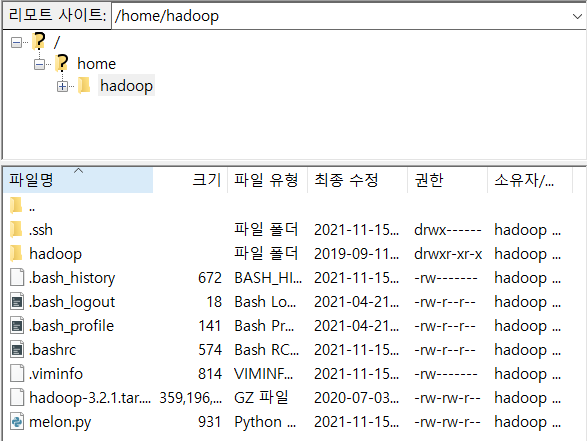

In [15]:
Image(filename='./images/filezilla.PNG', width=600)

### 3. 가상환경 생성 후 melon.py 실행하기
- melon.py를 실행하기 위해서는 requests, bs4, lxml 설치 필요
- 실행이 완료되면 lyrics 디렉토리에 100곡의 가사 텍스트 파일이 생성됨

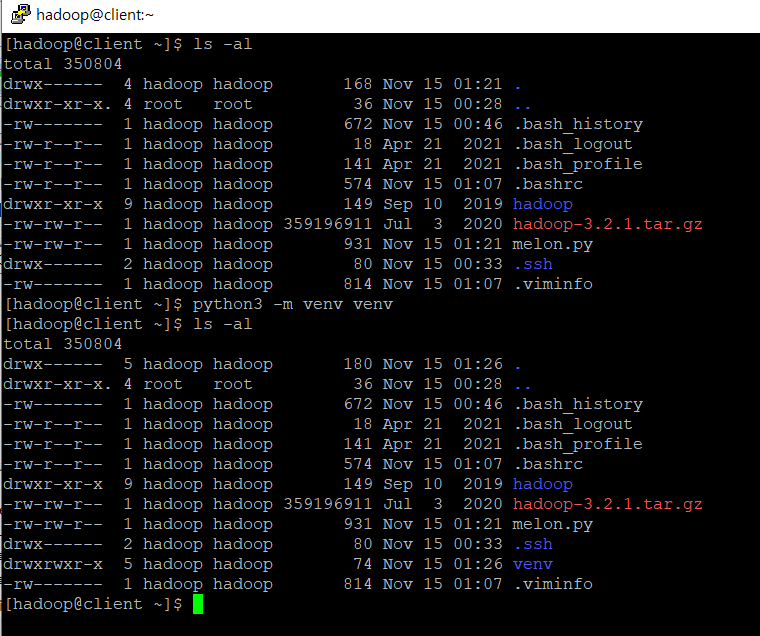

In [16]:
Image(filename='./images/venv.PNG', width=600)

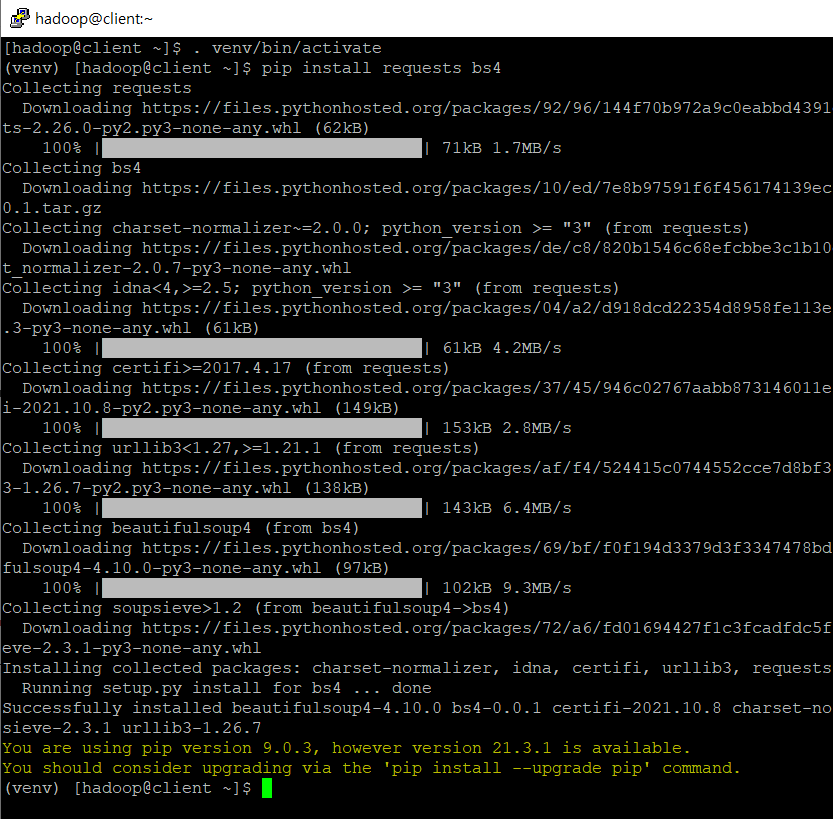

In [17]:
Image(filename='./images/venv2.PNG', width=600)

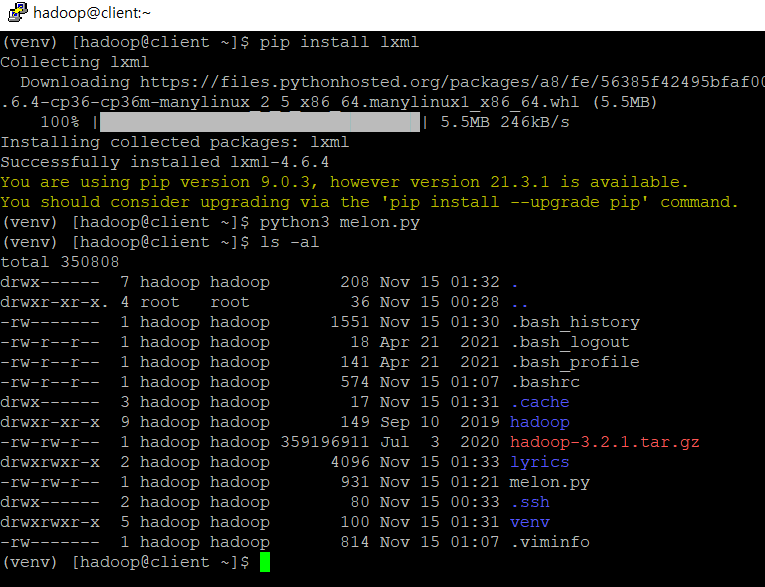

In [18]:
Image(filename='./images/venv3.PNG', width=600)

### 4. 가사 파일들을 하둡 분산 파일 시스템에 업로드하기
- /lyrics 디렉토리 안에 올리기

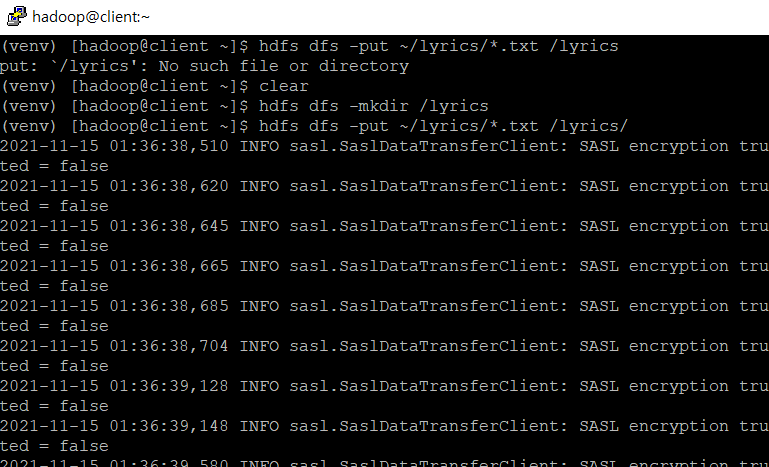

In [19]:
Image(filename='./images/upload.PNG', width=600)

### 5. Mapreduce를 활용해 가장 많이 나온 단어 찾기
- 영어는 제외한다.
- /lyrics_out 디렉토리에 저장된다.

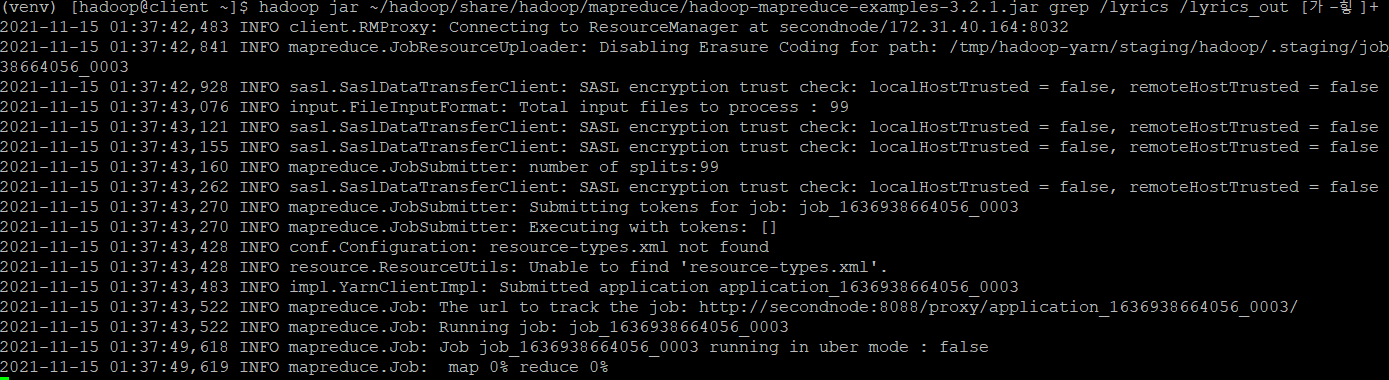

In [22]:
Image(filename='./images/mapreduce.PNG', width=900)

### 6. 결과를 보기 쉽게 result.txt 파일에 저장하기

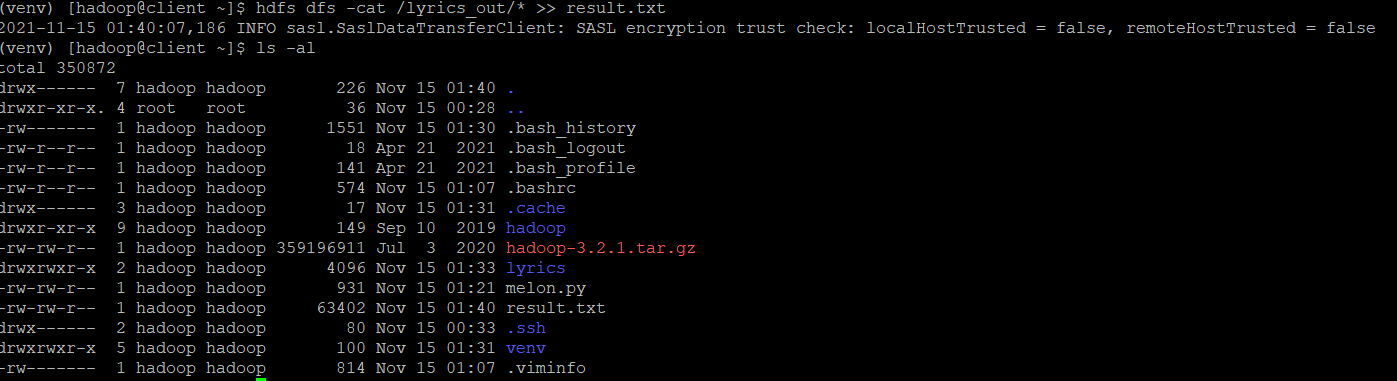

In [23]:
Image(filename='./images/result.PNG', width=900)

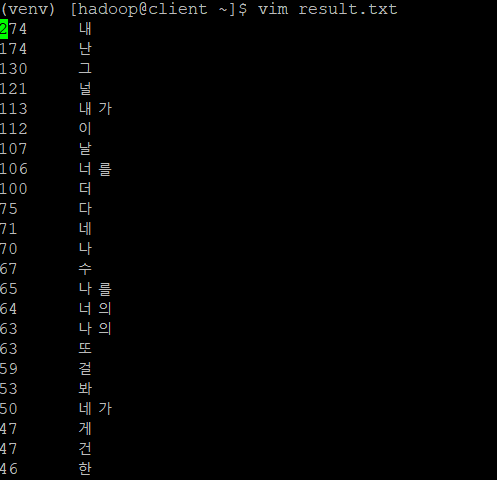

In [9]:
Image(filename='./images/result2.PNG')

### 7. 느낀점
- 처음에 melon.py 코드를 작성할 때는 br태그를 따로 처리하지 않고 진행해서 줄바꿈이 있는 두 단어가 한 단어로 인식되어 <br>
결과물이 제대로 나오지 않았었는데 br태그를 "\n"으로 변환 후 진행하여 해결할 수 있었다.
- 현재는 불용어처리를 하지 않고 진행했는데 비정형 데이터 처리에 대한 공부 필요하다고 느꼈다. 
- 하둡을 좀 더 이해할 수 있었던 프로젝트였고 전처리를 하고 진행하면 유의미한 결과물을 낼 수 있을 것 같다.